In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
df = pd.read_csv("data/raw/Media-Matrix-Combined.csv")

In [13]:
print(df.shape) #row vs columns
print(df.columns) # column names (in this case index)
print(df.head())
df.info()
df.describe()

(61, 27)
Index(['Compound', 'PubChemCID', '1_YAR', '2a_YAR', '2b_YAR', '2c_YAR',
       '2d_YAR', '3a_YAR', '3b_YAR', '3c_YAR', '4_YAR', '5_YAR', '1_CER',
       '2_CER', '3_CER', '4_CER', '5a_CER', '5b_CER', '1a_PIC', '1b_PIC',
       '1c_PIC', '1d_PIC', '2a_PIC', '3a_PIC', '3b_PIC', '4a_PIC', '4b_PIC'],
      dtype='object')
                                  Compound  PubChemCID  1_YAR    2a_YAR  \
0  Ammonium iron (II) sulphate hexahydrate    15942308   0.00  0.000000   
1                       Ammonium phosphate       24540   0.00  0.000000   
2                        Ammonium sulphate     6097028   3.77  5.000000   
3                                 Arginine        6322   0.00  0.000000   
4                                   Biotin      171548   0.00  0.000025   

     2b_YAR    2c_YAR    2d_YAR    3a_YAR    3b_YAR  3c_YAR  ...  5b_CER  \
0  0.000000  0.000000  0.000000  0.000000  0.000000    0.00  ...     0.0   
1  0.000000  0.000000  0.000000  0.000000  0.000000    0.00  ...    

,PubChemCID,1_YAR,2a_YAR,2b_YAR,2c_YAR,2d_YAR,3a_YAR,3b_YAR,3c_YAR,4_YAR,...,5b_CER,1a_PIC,1b_PIC,1c_PIC,1d_PIC,2a_PIC,3a_PIC,3b_PIC,4a_PIC,4b_PIC
count,6.100000e+01,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,...,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,6.135542e+06,0.559884,0.467981,0.467981,0.877817,0.467981,0.389432,0.745903,1.048921,1.452281,...,5.914098,0.423171,0.423498,0.772546,0.223056,2.007250,0.468144,12.035804,1.497705,1.155410
std,2.145378e+07,2.136989,2.648556,2.648556,5.791152,1.918728,2.569147,3.261675,3.299653,10.251500,...,38.713732,1.640879,1.641364,3.483880,1.026596,12.352831,2.648529,93.458761,6.795466,5.982008
min,7.530000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.961000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.628000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.775770e+05,0.000224,0.000400,0.000400,0.000400,0.000500,0.000000,0.000000,0.000900,0.000800,...,0.000000,0.000007,0.000000,0.000000,0.000000,0.000000,0.000300,0.000000,0.000000,0.000000
max,1.383197e+08,12.930000,20.000000,20.000000,45.000000,10.000000,20.000000,20.000000,20.000000,80.000000,...,300.000000,10.000000,10.000000,22.695000,7.230000,95.200000,20.000000,730.000000,45.200000,45.200000


In [11]:
df.nunique()

Compound      61
PubChemCID    61
1_YAR         16
2a_YAR        18
2b_YAR        18
2c_YAR        18
2d_YAR        18
3a_YAR        14
3b_YAR         9
3c_YAR        18
4_YAR         16
5_YAR         17
1_CER         10
2_CER         14
3_CER         16
4_CER         16
5a_CER        12
5b_CER        12
1a_PIC        15
1b_PIC        14
1c_PIC        15
1d_PIC        15
2a_PIC        14
3a_PIC        15
3b_PIC        13
4a_PIC         7
4b_PIC         9
dtype: int64

In [14]:
# remove pubchemid column
df = df.drop(df.columns[1], axis=1)

In [ ]:
# set index to compound names
df.set_index(df.columns[0], inplace=True)

In [19]:
print(df.head())

                                         1_YAR    2a_YAR    2b_YAR    2c_YAR  \
Compound                                                                       
Ammonium iron (II) sulphate hexahydrate   0.00  0.000000  0.000000  0.000000   
Ammonium phosphate                        0.00  0.000000  0.000000  0.000000   
Ammonium sulphate                         3.77  5.000000  5.000000  5.000000   
Arginine                                  0.00  0.000000  0.000000  0.000000   
Biotin                                    0.00  0.000025  0.000025  0.000025   

                                           2d_YAR    3a_YAR    3b_YAR  3c_YAR  \
Compound                                                                        
Ammonium iron (II) sulphate hexahydrate  0.000000  0.000000  0.000000    0.00   
Ammonium phosphate                       0.000000  0.000000  0.000000    0.00   
Ammonium sulphate                        5.000000  0.000000  4.000000    4.50   
Arginine                          

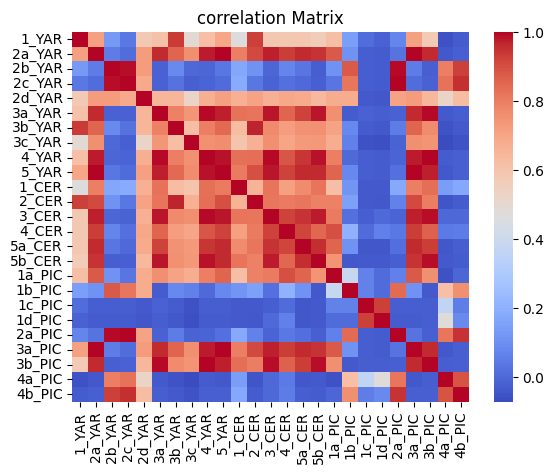

In [ ]:


sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("correlation Matrix")
plt.show()

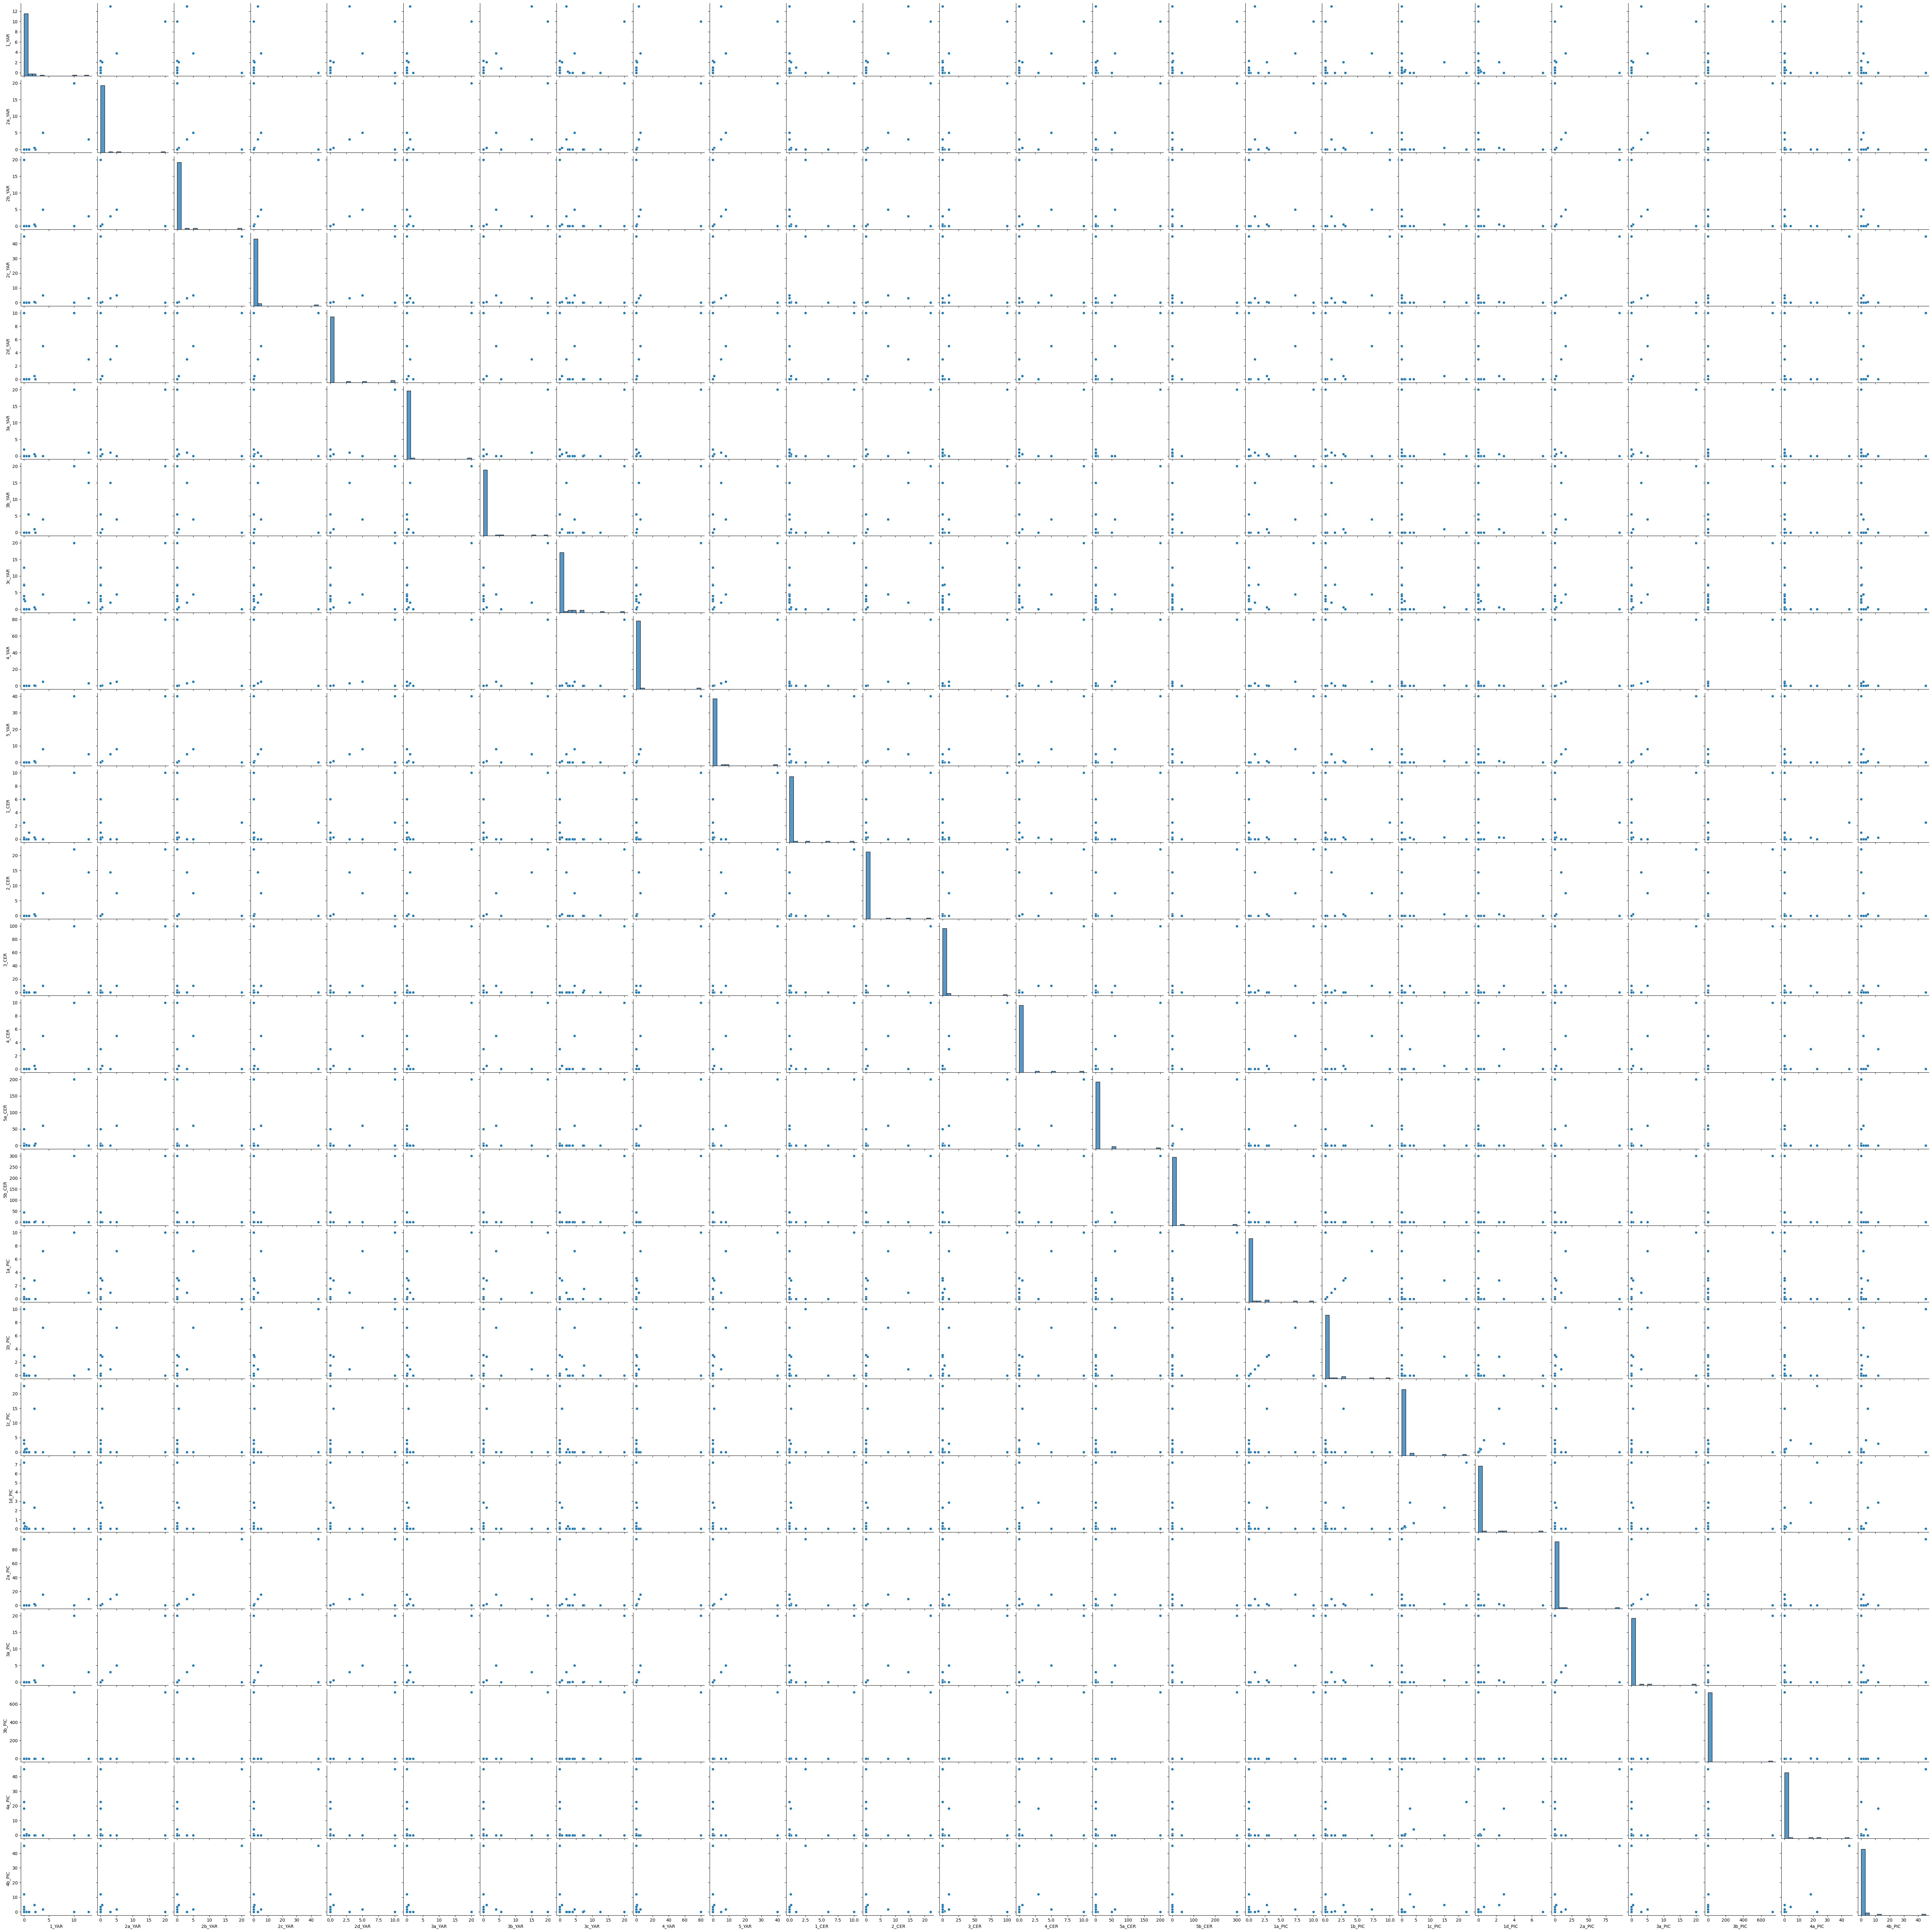

In [20]:
sns.pairplot(df)

In [24]:
print(scipy.__version__)

1.15.3


In [25]:
sns.clustermap(df, cmap='vlag', metric='euclidean', figsize=(10, 8))


RuntimeError: clustermap requires scipy to be available